In [17]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
df = pd.read_csv("kyphosis.csv")

In [19]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## About Data
This Dataset represents the number of patients who had "Kyphosis" which is a spinal condition and then they had a operation.The Operation was a corrective spinal surgery.
The Dataset tells us if Kyphosis is Present or absent after the surgery

Features:
* Kyphosis:'present' or 'absent (Target)
* Age: In months
* Number: The number of vertebrae involved in the operation
* Start: The number of the first or the top most vertebrae that was operated

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


# Pairplot

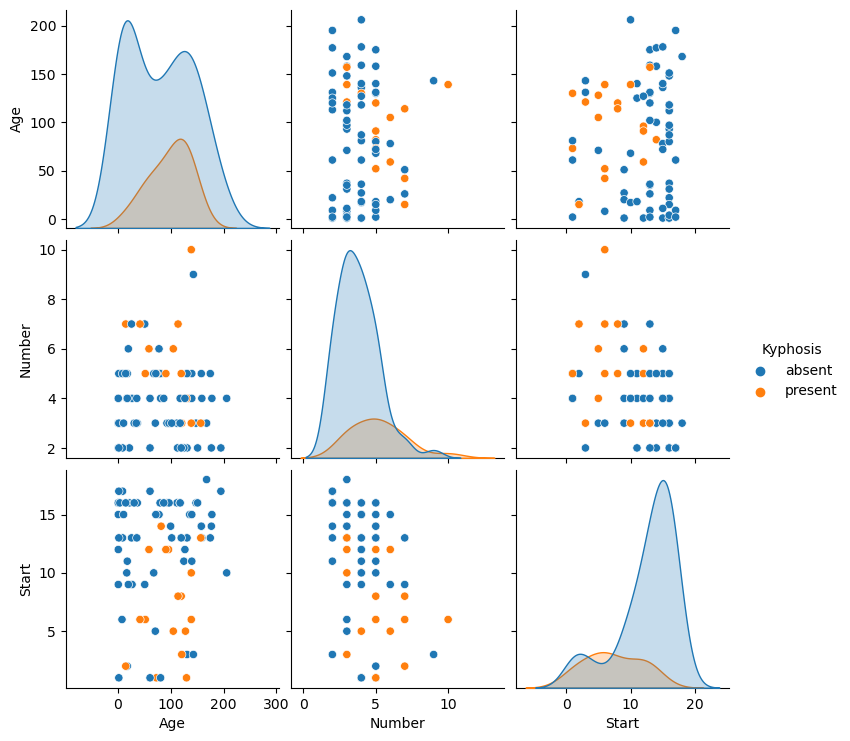

In [21]:
sns.pairplot(df,hue='Kyphosis')

# Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop('Kyphosis',axis=1)

In [24]:
y = df['Kyphosis']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dtree = DecisionTreeClassifier()

In [28]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

### Prediction and Evaluation

In [29]:
predictions =dtree.predict(X_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
print('Confusion Matrix:','\n',confusion_matrix(y_test,predictions))
print('*'*80)
print('Classification Report:','\n',classification_report(y_test,predictions))

Confusion Matrix: 
 [[20  0]
 [ 3  2]]
********************************************************************************
Classification Report: 
               precision    recall  f1-score   support

      absent       0.87      1.00      0.93        20
     present       1.00      0.40      0.57         5

    accuracy                           0.88        25
   macro avg       0.93      0.70      0.75        25
weighted avg       0.90      0.88      0.86        25



# Visualization of Decision Tree

[Text(0.5416666666666666, 0.9285714285714286, 'X[2] <= 12.5\ngini = 0.337\nsamples = 56\nvalue = [44, 12]'),
 Text(0.3333333333333333, 0.7857142857142857, 'X[0] <= 34.5\ngini = 0.483\nsamples = 27\nvalue = [16, 11]'),
 Text(0.25, 0.6428571428571429, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.4166666666666667, 0.6428571428571429, 'X[0] <= 123.0\ngini = 0.499\nsamples = 21\nvalue = [10, 11]'),
 Text(0.25, 0.5, 'X[0] <= 86.0\ngini = 0.426\nsamples = 13\nvalue = [4, 9]'),
 Text(0.16666666666666666, 0.35714285714285715, 'X[1] <= 4.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.25, 0.21428571428571427, 'X[2] <= 7.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.16666666666666666, 0.07142857142857142, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.3333333333333333, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.35714285714285715

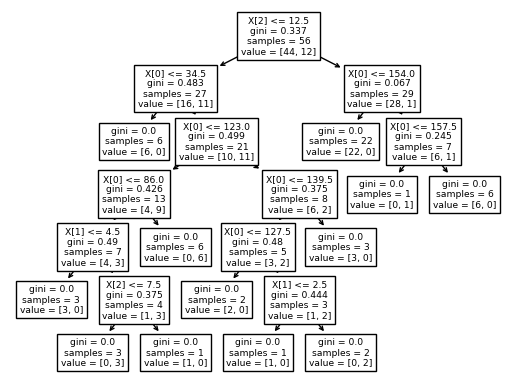

In [32]:
from sklearn import tree
tree.plot_tree(dtree)

# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf = RandomForestClassifier(n_estimators=200)

In [35]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

### Prediction and Evaluation

In [36]:
rf_pred = rf.predict(X_test)

In [37]:
print('Confusion Matrix:','\n',confusion_matrix(y_test,rf_pred))
print('*'*80)
print('Classification Report:','\n',classification_report(y_test,rf_pred))

Confusion Matrix: 
 [[20  0]
 [ 5  0]]
********************************************************************************
Classification Report: 
               precision    recall  f1-score   support

      absent       0.80      1.00      0.89        20
     present       0.00      0.00      0.00         5

    accuracy                           0.80        25
   macro avg       0.40      0.50      0.44        25
weighted avg       0.64      0.80      0.71        25



c:\Users\car\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\car\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\car\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Since the dataset is small with 81 records it has performed well in Decision Tree with Accuracy of 0.88(88%)